### Purpose

Test the WaveNet network on `pseudoGR` features. Demonstrate the difference between `categorical` loss, `ordinal` loss, and a combination.

In [1]:
import numpy as np
from sklearn.metrics import confusion_matrix

from corebreakout.facies.viz import model_plots
from corebreakout.facies.models import NetworkModel
from corebreakout.facies.datasets import DepthSequenceGenerator, FaciesDataset


import os

os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]="1"

import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [8]:
well_names = ["205-21b-3", "204-20-6a", "204-24a-6", "204-20-1Z", "204-19-6"]

loss_options = ('categorical_crossentropy',
                'ordinal_squared_error',
                {'categorical_crossentropy': 0.2,
                 'ordinal_squared_error': 0.8})

wavenet_model_args = {
    'feature' : 'pseudoGR',
    'network' : 'wavenet',
    'sequence_size' : 128,
    'network_args' : {
        'num_blocks' : 20,
        'block_filters' : 128,
        'residual_filters' : 64,
        'output_resolution' : 32,
        'dropout_rate' : 0.5,
    },
    'optimizer_args' : {
        'optimizer' : 'Adam'
    }
}

fit_args = {
    'batch_size' : 16,
    'epochs' : 15,
    'class_weighted': True
}




TESTING WITH TEST WELL: 205-21b-3


Loading Well:  204-20-6a  from  /home/administrator/Dropbox/core_data/facies/train_data
Feature shapes:  [('depth', (3873,)), ('top', (3873,)), ('base', (3873,)), ('pseudoGR', (3873, 32))]
Loading Well:  204-24a-6  from  /home/administrator/Dropbox/core_data/facies/train_data
Feature shapes:  [('depth', (13006,)), ('top', (13006,)), ('base', (13006,)), ('pseudoGR', (13006, 32))]
Loading Well:  204-20-1Z  from  /home/administrator/Dropbox/core_data/facies/train_data
Feature shapes:  [('depth', (2340,)), ('top', (2340,)), ('base', (2340,)), ('pseudoGR', (2340, 32))]
Loading Well:  204-19-6  from  /home/administrator/Dropbox/core_data/facies/train_data
Feature shapes:  [('depth', (1884,)), ('top', (1884,)), ('base', (1884,)), ('pseudoGR', (1884, 32))]
Loading Well:  205-21b-3  from  /home/administrator/Dropbox/core_data/facies/train_data
Feature shapes:  [('depth', (3842,)), ('top', (3842,)), ('base', (3842,)), ('pseudoGR', (3842, 32))]

MODELING WITH

21/21 [==============================] - 20s 954ms/step - loss: 1.6309 - acc: 0.3118 - val_loss: 2.3080 - val_acc: 0.0461
Epoch 2/15
21/21 [==============================] - 8s 382ms/step - loss: 1.2474 - acc: 0.5263 - val_loss: 2.6547 - val_acc: 0.0114
Epoch 3/15
21/21 [==============================] - 8s 394ms/step - loss: 1.1073 - acc: 0.5770 - val_loss: 2.0357 - val_acc: 0.0114
Epoch 4/15
21/21 [==============================] - 8s 396ms/step - loss: 1.1396 - acc: 0.5651 - val_loss: 1.6149 - val_acc: 0.0265
Epoch 5/15
21/21 [==============================] - 8s 398ms/step - loss: 1.1275 - acc: 0.5658 - val_loss: 1.8859 - val_acc: 0.1950
Epoch 6/15
21/21 [==============================] - 8s 399ms/step - loss: 1.1004 - acc: 0.5883 - val_loss: 1.7726 - val_acc: 0.0124
Epoch 7/15
21/21 [==============================] - 8s 398ms/step - loss: 1.0930 - acc: 0.5764 - val_loss: 2.0606 - val_acc: 0.0404
Epoch 8/15
21/21 [==============================] - 8s 398ms/step - loss: 1.0875 - acc

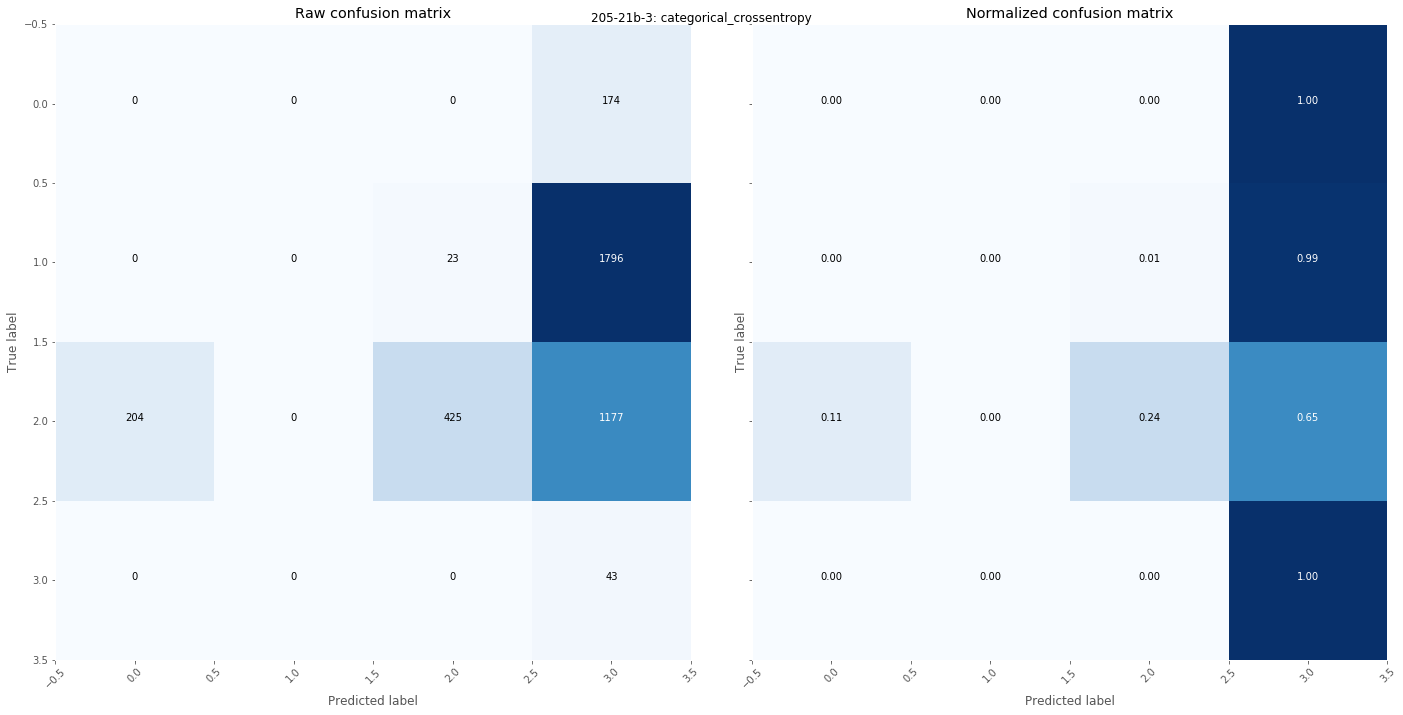


MODELING WITH LOSS: ordinal_squared_error

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 4096)         0                                            
__________________________________________________________________________________________________
reshape_1 (Reshape)             (None, 4096, 1)      0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1d_66 (Conv1D)              (None, 4096, 64)     512         reshape_1[0][0]                  
__________________________________________________________________________________________________
conv1d_67 (Conv1D)              (None, 4096, 128)    24704       conv1d_66[0][0]                  
_________________________________________________________________

21/21 [==============================] - 20s 939ms/step - loss: 1.6735 - acc: 0.3358 - val_loss: 1.4507 - val_acc: 0.1026
Epoch 2/15
21/21 [==============================] - 8s 398ms/step - loss: 1.2141 - acc: 0.5454 - val_loss: 1.9757 - val_acc: 0.0114
Epoch 3/15
21/21 [==============================] - 8s 400ms/step - loss: 1.1105 - acc: 0.5874 - val_loss: 2.4018 - val_acc: 0.0114
Epoch 4/15
21/21 [==============================] - 8s 398ms/step - loss: 1.1107 - acc: 0.5933 - val_loss: 2.0791 - val_acc: 0.0114
Epoch 5/15
21/21 [==============================] - 8s 399ms/step - loss: 1.0974 - acc: 0.5955 - val_loss: 1.9837 - val_acc: 0.0114
Epoch 6/15
21/21 [==============================] - 8s 401ms/step - loss: 1.0968 - acc: 0.5868 - val_loss: 1.8216 - val_acc: 0.0114
Epoch 7/15
21/21 [==============================] - 8s 400ms/step - loss: 1.0691 - acc: 0.5973 - val_loss: 1.8813 - val_acc: 0.0114
Epoch 8/15
21/21 [==============================] - 8s 400ms/step - loss: 1.0918 - acc

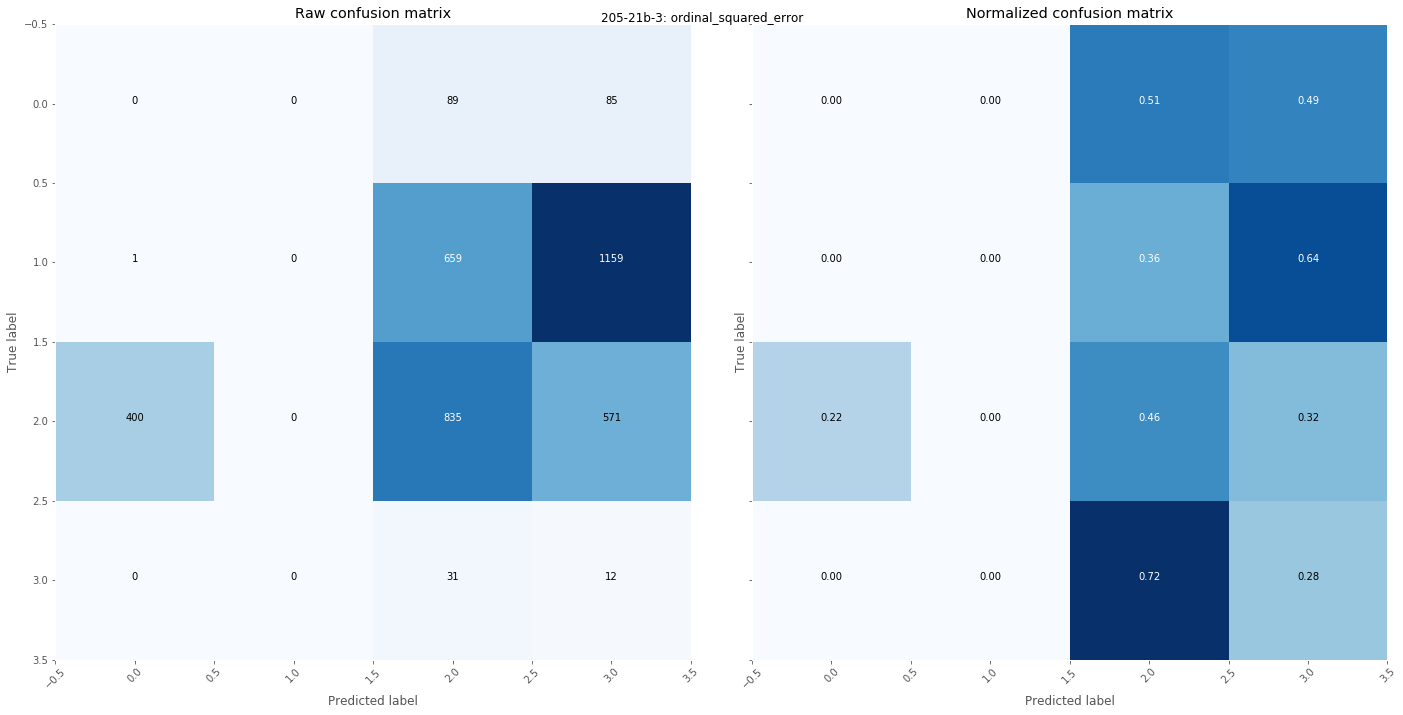


MODELING WITH LOSS: {'categorical_crossentropy': 0.2, 'ordinal_squared_error': 0.8}

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 4096)         0                                            
__________________________________________________________________________________________________
reshape_2 (Reshape)             (None, 4096, 1)      0           input_3[0][0]                    
__________________________________________________________________________________________________
conv1d_132 (Conv1D)             (None, 4096, 64)     512         reshape_2[0][0]                  
__________________________________________________________________________________________________
conv1d_133 (Conv1D)             (None, 4096, 128)    24704       conv1d_132[0][0]                 
_______________________

21/21 [==============================] - 21s 990ms/step - loss: 1.6843 - acc: 0.3331 - val_loss: 2.1817 - val_acc: 0.0461
Epoch 2/15
21/21 [==============================] - 8s 402ms/step - loss: 1.2035 - acc: 0.5133 - val_loss: 2.4017 - val_acc: 0.0114
Epoch 3/15
21/21 [==============================] - 8s 403ms/step - loss: 1.1290 - acc: 0.5868 - val_loss: 2.3474 - val_acc: 0.0114
Epoch 4/15
21/21 [==============================] - 8s 403ms/step - loss: 1.1274 - acc: 0.5788 - val_loss: 1.7338 - val_acc: 0.0229
Epoch 5/15
21/21 [==============================] - 8s 404ms/step - loss: 1.0884 - acc: 0.5909 - val_loss: 1.8703 - val_acc: 0.0114
Epoch 6/15
21/21 [==============================] - 8s 402ms/step - loss: 1.1275 - acc: 0.5733 - val_loss: 1.7683 - val_acc: 0.0114
Epoch 7/15
21/21 [==============================] - 8s 404ms/step - loss: 1.0943 - acc: 0.5883 - val_loss: 1.7407 - val_acc: 0.0207
Epoch 8/15
21/21 [==============================] - 8s 402ms/step - loss: 1.0979 - acc

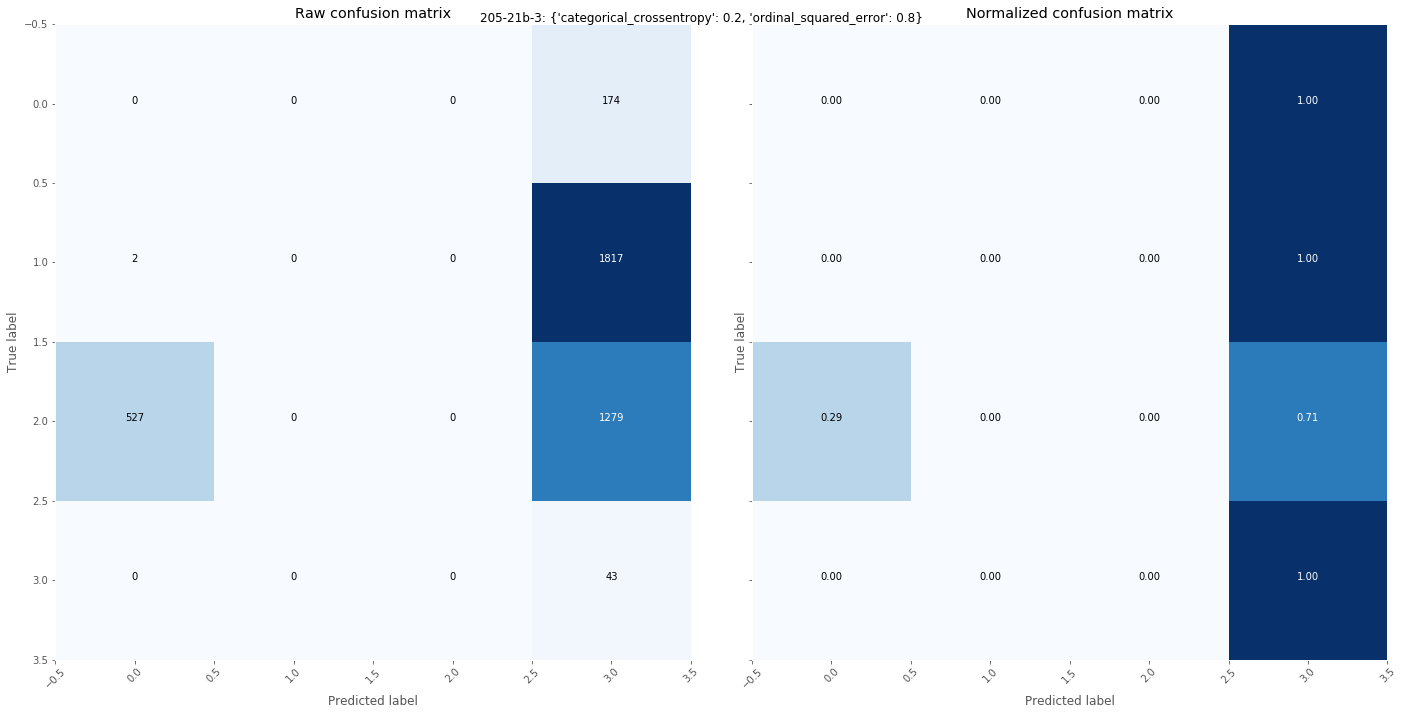



TESTING WITH TEST WELL: 204-20-6a


Loading Well:  205-21b-3  from  /home/administrator/Dropbox/core_data/facies/train_data
Feature shapes:  [('depth', (3842,)), ('top', (3842,)), ('base', (3842,)), ('pseudoGR', (3842, 32))]
Loading Well:  204-24a-6  from  /home/administrator/Dropbox/core_data/facies/train_data
Feature shapes:  [('depth', (13006,)), ('top', (13006,)), ('base', (13006,)), ('pseudoGR', (13006, 32))]
Loading Well:  204-20-1Z  from  /home/administrator/Dropbox/core_data/facies/train_data
Feature shapes:  [('depth', (2340,)), ('top', (2340,)), ('base', (2340,)), ('pseudoGR', (2340, 32))]
Loading Well:  204-19-6  from  /home/administrator/Dropbox/core_data/facies/train_data
Feature shapes:  [('depth', (1884,)), ('top', (1884,)), ('base', (1884,)), ('pseudoGR', (1884, 32))]
Loading Well:  204-20-6a  from  /home/administrator/Dropbox/core_data/facies/train_data
Feature shapes:  [('depth', (3873,)), ('top', (3873,)), ('base', (3873,)), ('pseudoGR', (3873, 32))]

MODELING WITH

21/21 [==============================] - 21s 1s/step - loss: 1.6509 - acc: 0.3469 - val_loss: 1.5856 - val_acc: 0.1597
Epoch 2/15
21/21 [==============================] - 8s 381ms/step - loss: 1.2751 - acc: 0.4680 - val_loss: 1.2910 - val_acc: 0.3864
Epoch 3/15
21/21 [==============================] - 8s 389ms/step - loss: 1.1996 - acc: 0.5297 - val_loss: 1.3171 - val_acc: 0.2695
Epoch 4/15
21/21 [==============================] - 8s 389ms/step - loss: 1.1643 - acc: 0.5314 - val_loss: 1.2932 - val_acc: 0.4127
Epoch 5/15
21/21 [==============================] - 8s 388ms/step - loss: 1.1542 - acc: 0.5379 - val_loss: 1.2738 - val_acc: 0.3966
Epoch 6/15
21/21 [==============================] - 8s 388ms/step - loss: 1.1588 - acc: 0.5413 - val_loss: 1.2986 - val_acc: 0.4141
Epoch 7/15
21/21 [==============================] - 8s 390ms/step - loss: 1.1365 - acc: 0.5424 - val_loss: 1.3619 - val_acc: 0.4019
Epoch 8/15
21/21 [==============================] - 8s 392ms/step - loss: 1.1482 - acc: 0

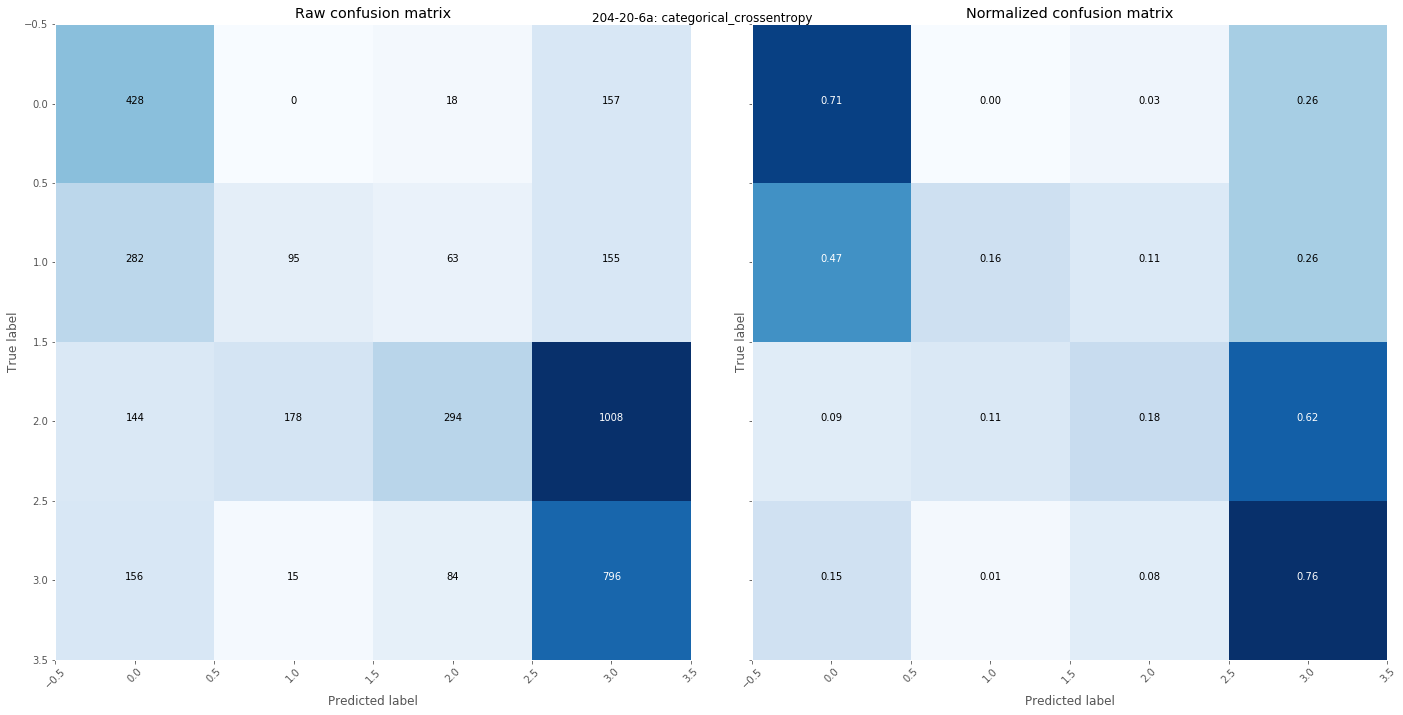


MODELING WITH LOSS: ordinal_squared_error

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            (None, 4096)         0                                            
__________________________________________________________________________________________________
reshape_4 (Reshape)             (None, 4096, 1)      0           input_5[0][0]                    
__________________________________________________________________________________________________
conv1d_264 (Conv1D)             (None, 4096, 64)     512         reshape_4[0][0]                  
__________________________________________________________________________________________________
conv1d_265 (Conv1D)             (None, 4096, 128)    24704       conv1d_264[0][0]                 
_________________________________________________________________

21/21 [==============================] - 22s 1s/step - loss: 1.7699 - acc: 0.2942 - val_loss: 1.9166 - val_acc: 0.1597
Epoch 2/15
21/21 [==============================] - 8s 393ms/step - loss: 1.3369 - acc: 0.4078 - val_loss: 1.3191 - val_acc: 0.3512
Epoch 3/15
21/21 [==============================] - 8s 390ms/step - loss: 1.2277 - acc: 0.4949 - val_loss: 1.2954 - val_acc: 0.3677
Epoch 4/15
21/21 [==============================] - 8s 390ms/step - loss: 1.1823 - acc: 0.5383 - val_loss: 1.2856 - val_acc: 0.3947
Epoch 5/15
21/21 [==============================] - 8s 391ms/step - loss: 1.1796 - acc: 0.5307 - val_loss: 1.3194 - val_acc: 0.4074
Epoch 6/15
21/21 [==============================] - 8s 393ms/step - loss: 1.1482 - acc: 0.5530 - val_loss: 1.3453 - val_acc: 0.4093
Epoch 7/15
21/21 [==============================] - 8s 392ms/step - loss: 1.1292 - acc: 0.5498 - val_loss: 1.2426 - val_acc: 0.4045
Epoch 8/15
21/21 [==============================] - 8s 392ms/step - loss: 1.1218 - acc: 0

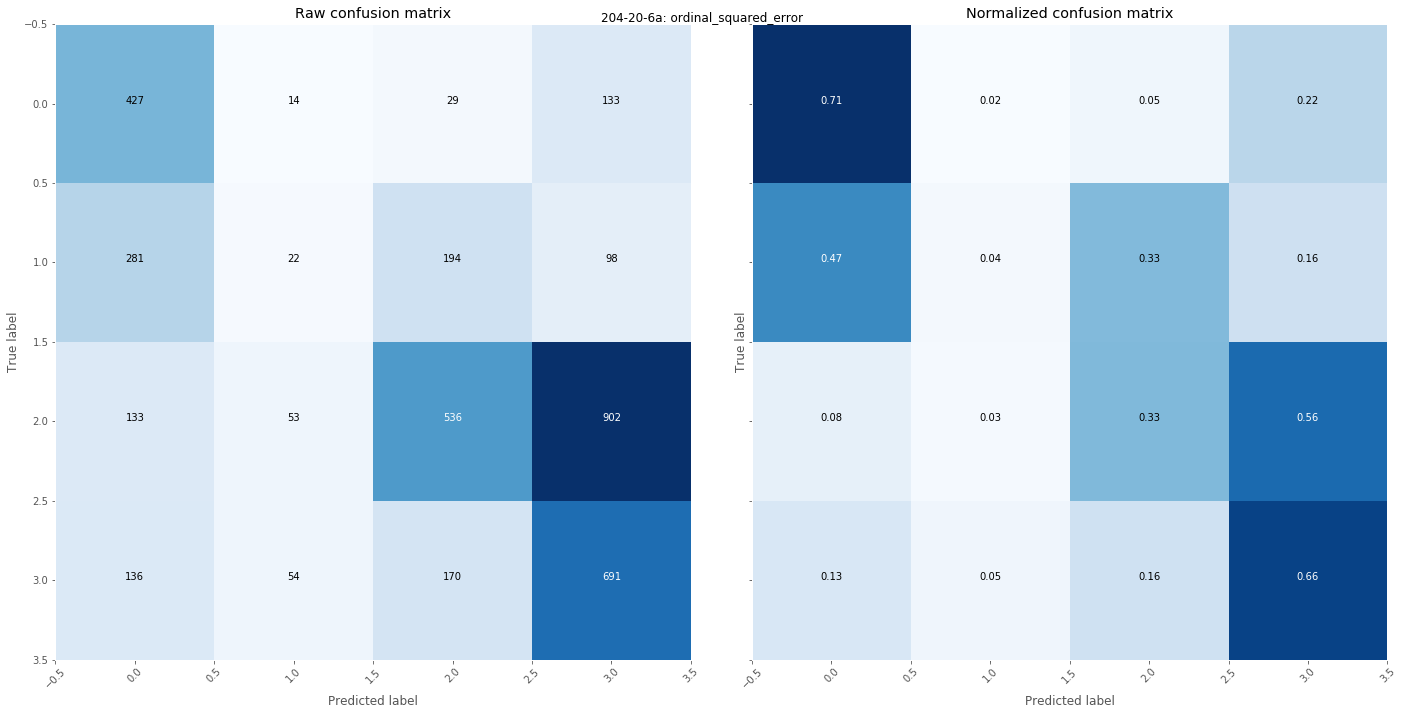


MODELING WITH LOSS: {'categorical_crossentropy': 0.2, 'ordinal_squared_error': 0.8}

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            (None, 4096)         0                                            
__________________________________________________________________________________________________
reshape_5 (Reshape)             (None, 4096, 1)      0           input_6[0][0]                    
__________________________________________________________________________________________________
conv1d_330 (Conv1D)             (None, 4096, 64)     512         reshape_5[0][0]                  
__________________________________________________________________________________________________
conv1d_331 (Conv1D)             (None, 4096, 128)    24704       conv1d_330[0][0]                 
_______________________

21/21 [==============================] - 24s 1s/step - loss: 1.7956 - acc: 0.3204 - val_loss: 1.5521 - val_acc: 0.3187
Epoch 2/15
21/21 [==============================] - 8s 392ms/step - loss: 1.2857 - acc: 0.4848 - val_loss: 1.1896 - val_acc: 0.4485
Epoch 3/15
21/21 [==============================] - 8s 393ms/step - loss: 1.1556 - acc: 0.5288 - val_loss: 1.2646 - val_acc: 0.3840
Epoch 4/15
21/21 [==============================] - 8s 394ms/step - loss: 1.1481 - acc: 0.5413 - val_loss: 1.3991 - val_acc: 0.3663
Epoch 5/15
21/21 [==============================] - 8s 393ms/step - loss: 1.1372 - acc: 0.5561 - val_loss: 1.3317 - val_acc: 0.4147
Epoch 6/15
21/21 [==============================] - 8s 395ms/step - loss: 1.1714 - acc: 0.5338 - val_loss: 1.2154 - val_acc: 0.4544
Epoch 7/15
21/21 [==============================] - 8s 394ms/step - loss: 1.1601 - acc: 0.5250 - val_loss: 1.3335 - val_acc: 0.4281
Epoch 8/15
21/21 [==============================] - 8s 395ms/step - loss: 1.1667 - acc: 0

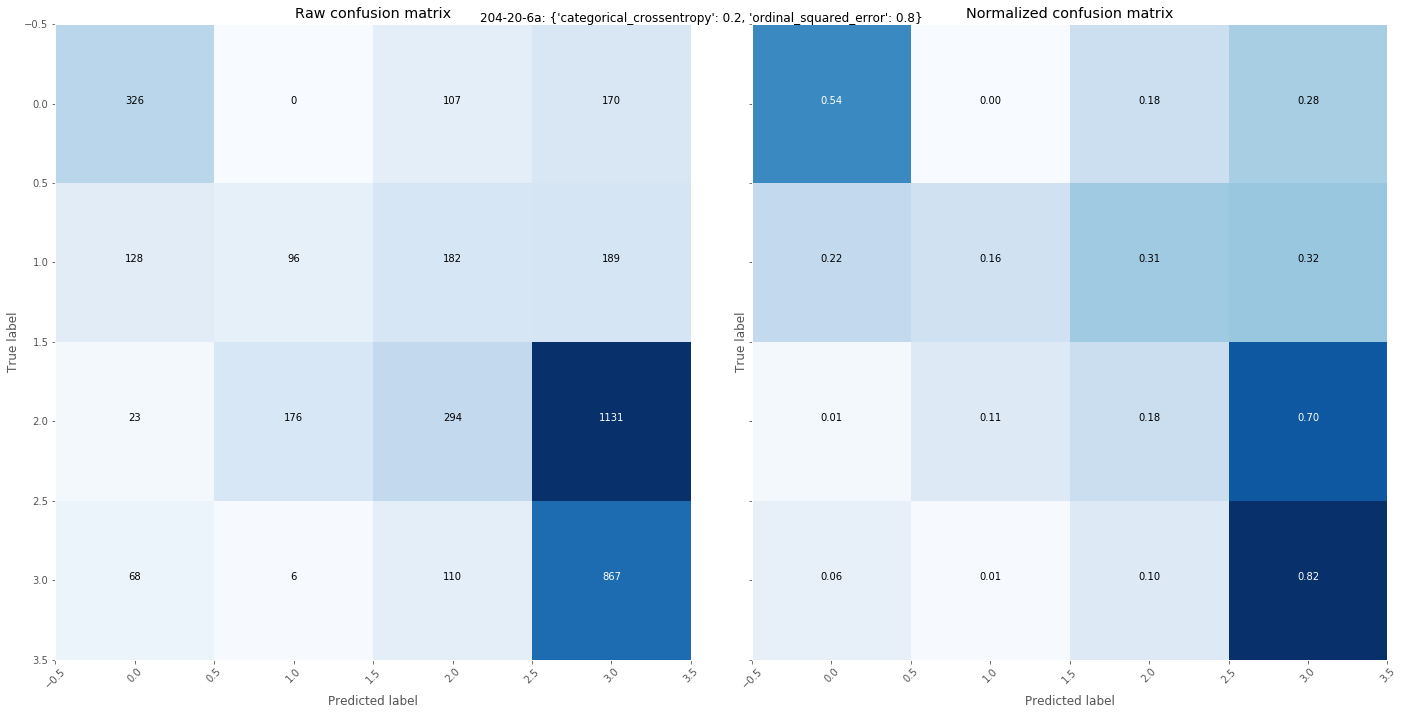



TESTING WITH TEST WELL: 204-24a-6


Loading Well:  205-21b-3  from  /home/administrator/Dropbox/core_data/facies/train_data
Feature shapes:  [('depth', (3842,)), ('top', (3842,)), ('base', (3842,)), ('pseudoGR', (3842, 32))]
Loading Well:  204-20-6a  from  /home/administrator/Dropbox/core_data/facies/train_data
Feature shapes:  [('depth', (3873,)), ('top', (3873,)), ('base', (3873,)), ('pseudoGR', (3873, 32))]
Loading Well:  204-20-1Z  from  /home/administrator/Dropbox/core_data/facies/train_data
Feature shapes:  [('depth', (2340,)), ('top', (2340,)), ('base', (2340,)), ('pseudoGR', (2340, 32))]
Loading Well:  204-19-6  from  /home/administrator/Dropbox/core_data/facies/train_data
Feature shapes:  [('depth', (1884,)), ('top', (1884,)), ('base', (1884,)), ('pseudoGR', (1884, 32))]
Loading Well:  204-24a-6  from  /home/administrator/Dropbox/core_data/facies/train_data
Feature shapes:  [('depth', (13006,)), ('top', (13006,)), ('base', (13006,)), ('pseudoGR', (13006, 32))]

MODELING WITH

12/12 [==============================] - 23s 2s/step - loss: 1.6744 - acc: 0.3803 - val_loss: 1.7064 - val_acc: 0.2996
Epoch 2/15
12/12 [==============================] - 7s 600ms/step - loss: 1.2279 - acc: 0.4425 - val_loss: 1.7652 - val_acc: 0.3163
Epoch 3/15
12/12 [==============================] - 7s 597ms/step - loss: 1.1267 - acc: 0.4799 - val_loss: 1.6327 - val_acc: 0.3207
Epoch 4/15
12/12 [==============================] - 7s 620ms/step - loss: 1.0808 - acc: 0.5119 - val_loss: 1.7374 - val_acc: 0.3193
Epoch 5/15
12/12 [==============================] - 8s 626ms/step - loss: 1.0868 - acc: 0.5106 - val_loss: 1.6113 - val_acc: 0.3230
Epoch 6/15
12/12 [==============================] - 7s 614ms/step - loss: 1.0513 - acc: 0.5303 - val_loss: 1.7574 - val_acc: 0.3259
Epoch 7/15
12/12 [==============================] - 7s 618ms/step - loss: 1.0450 - acc: 0.5451 - val_loss: 1.5918 - val_acc: 0.3169
Epoch 8/15
12/12 [==============================] - 8s 627ms/step - loss: 1.0587 - acc: 0

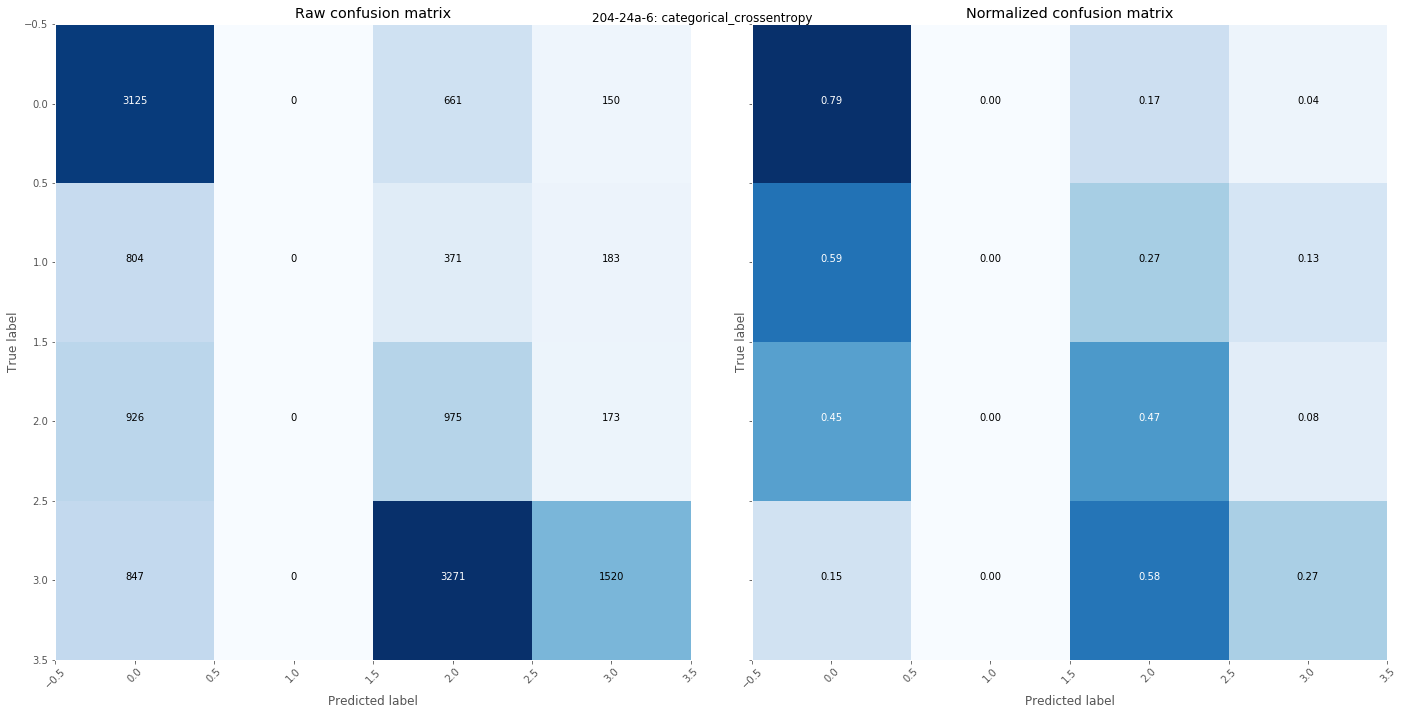


MODELING WITH LOSS: ordinal_squared_error

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_8 (InputLayer)            (None, 4096)         0                                            
__________________________________________________________________________________________________
reshape_7 (Reshape)             (None, 4096, 1)      0           input_8[0][0]                    
__________________________________________________________________________________________________
conv1d_462 (Conv1D)             (None, 4096, 64)     512         reshape_7[0][0]                  
__________________________________________________________________________________________________
conv1d_463 (Conv1D)             (None, 4096, 128)    24704       conv1d_462[0][0]                 
_________________________________________________________________

12/12 [==============================] - 24s 2s/step - loss: 1.7967 - acc: 0.3688 - val_loss: 1.3619 - val_acc: 0.2996
Epoch 2/15
12/12 [==============================] - 7s 613ms/step - loss: 1.2302 - acc: 0.3924 - val_loss: 1.4642 - val_acc: 0.3004
Epoch 3/15
12/12 [==============================] - 8s 632ms/step - loss: 1.0803 - acc: 0.4588 - val_loss: 1.4634 - val_acc: 0.3306
Epoch 4/15
12/12 [==============================] - 7s 619ms/step - loss: 1.0915 - acc: 0.5034 - val_loss: 1.6067 - val_acc: 0.3219
Epoch 5/15
12/12 [==============================] - 7s 619ms/step - loss: 1.0616 - acc: 0.5398 - val_loss: 1.7433 - val_acc: 0.3219
Epoch 6/15
12/12 [==============================] - 7s 619ms/step - loss: 1.0582 - acc: 0.5164 - val_loss: 1.6137 - val_acc: 0.3244
Epoch 7/15
12/12 [==============================] - 7s 623ms/step - loss: 1.0787 - acc: 0.5115 - val_loss: 1.5681 - val_acc: 0.3195
Epoch 8/15
12/12 [==============================] - 7s 617ms/step - loss: 1.1022 - acc: 0

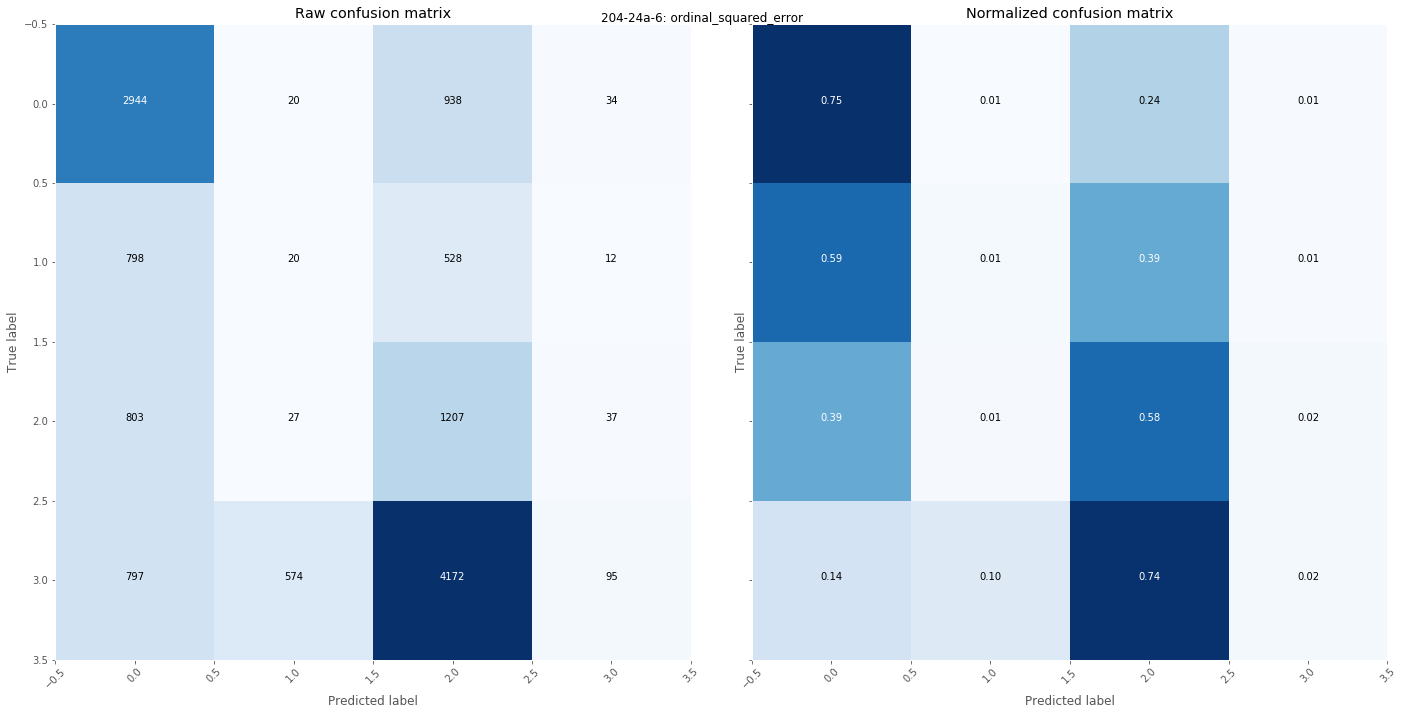


MODELING WITH LOSS: {'categorical_crossentropy': 0.2, 'ordinal_squared_error': 0.8}

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_9 (InputLayer)            (None, 4096)         0                                            
__________________________________________________________________________________________________
reshape_8 (Reshape)             (None, 4096, 1)      0           input_9[0][0]                    
__________________________________________________________________________________________________
conv1d_528 (Conv1D)             (None, 4096, 64)     512         reshape_8[0][0]                  
__________________________________________________________________________________________________
conv1d_529 (Conv1D)             (None, 4096, 128)    24704       conv1d_528[0][0]                 
_______________________

12/12 [==============================] - 25s 2s/step - loss: 1.8834 - acc: 0.2629 - val_loss: 1.3896 - val_acc: 0.2996
Epoch 2/15
12/12 [==============================] - 8s 629ms/step - loss: 1.2581 - acc: 0.3562 - val_loss: 1.5548 - val_acc: 0.3139
Epoch 3/15
12/12 [==============================] - 7s 623ms/step - loss: 1.1172 - acc: 0.4881 - val_loss: 1.6996 - val_acc: 0.3188
Epoch 4/15
12/12 [==============================] - 8s 627ms/step - loss: 1.0816 - acc: 0.5071 - val_loss: 1.5703 - val_acc: 0.2966
Epoch 5/15
12/12 [==============================] - 8s 633ms/step - loss: 1.0958 - acc: 0.5042 - val_loss: 1.4164 - val_acc: 0.3149
Epoch 6/15
12/12 [==============================] - 8s 638ms/step - loss: 1.1193 - acc: 0.4842 - val_loss: 1.7883 - val_acc: 0.3130
Epoch 7/15
12/12 [==============================] - 8s 637ms/step - loss: 1.1025 - acc: 0.5146 - val_loss: 1.7880 - val_acc: 0.3148
Epoch 8/15
12/12 [==============================] - 8s 626ms/step - loss: 1.0685 - acc: 0

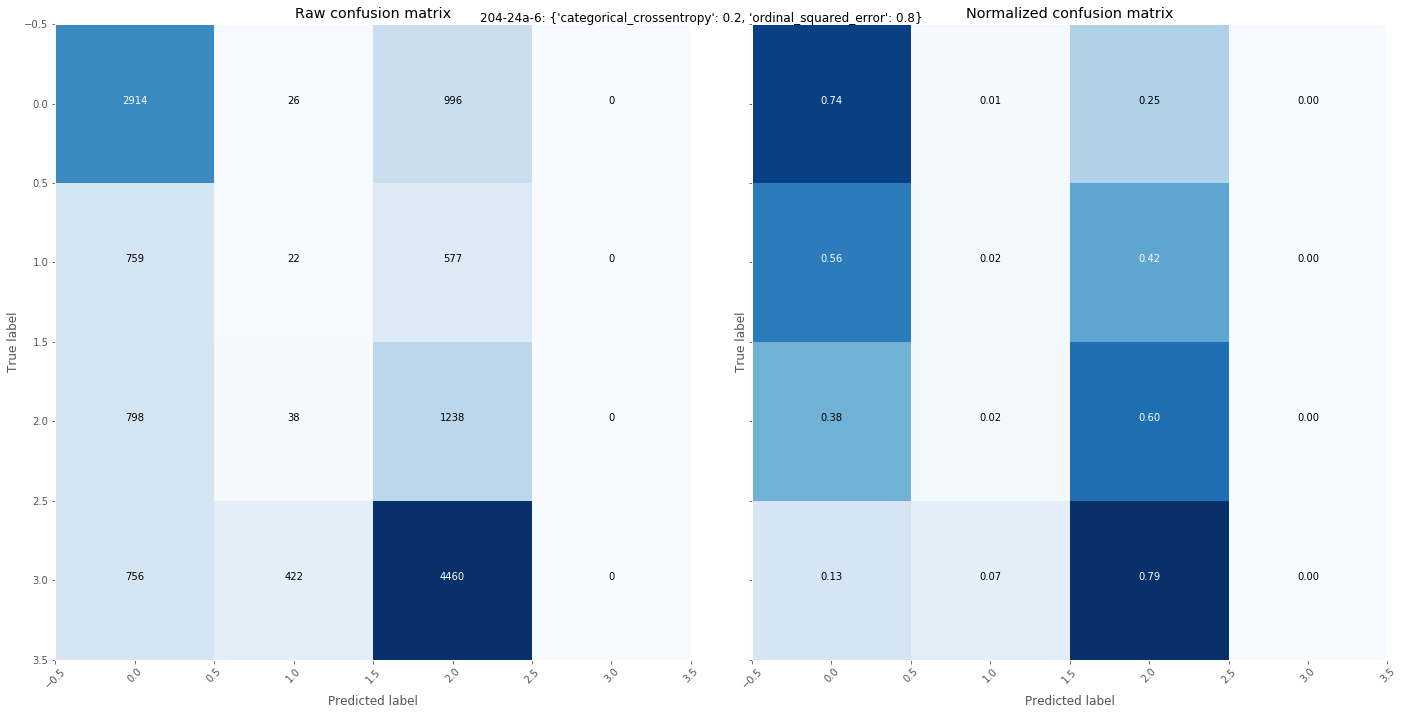



TESTING WITH TEST WELL: 204-20-1Z


Loading Well:  205-21b-3  from  /home/administrator/Dropbox/core_data/facies/train_data
Feature shapes:  [('depth', (3842,)), ('top', (3842,)), ('base', (3842,)), ('pseudoGR', (3842, 32))]
Loading Well:  204-20-6a  from  /home/administrator/Dropbox/core_data/facies/train_data
Feature shapes:  [('depth', (3873,)), ('top', (3873,)), ('base', (3873,)), ('pseudoGR', (3873, 32))]
Loading Well:  204-24a-6  from  /home/administrator/Dropbox/core_data/facies/train_data
Feature shapes:  [('depth', (13006,)), ('top', (13006,)), ('base', (13006,)), ('pseudoGR', (13006, 32))]
Loading Well:  204-19-6  from  /home/administrator/Dropbox/core_data/facies/train_data
Feature shapes:  [('depth', (1884,)), ('top', (1884,)), ('base', (1884,)), ('pseudoGR', (1884, 32))]
Loading Well:  204-20-1Z  from  /home/administrator/Dropbox/core_data/facies/train_data
Feature shapes:  [('depth', (2340,)), ('top', (2340,)), ('base', (2340,)), ('pseudoGR', (2340, 32))]

MODELING WITH

22/22 [==============================] - 28s 1s/step - loss: 1.5510 - acc: 0.2716 - val_loss: 5.7224 - val_acc: 0.7342
Epoch 2/15
22/22 [==============================] - 8s 384ms/step - loss: 1.2778 - acc: 0.4658 - val_loss: 7.4957 - val_acc: 0.5975
Epoch 3/15
22/22 [==============================] - 9s 392ms/step - loss: 1.2173 - acc: 0.4828 - val_loss: 6.8574 - val_acc: 0.7190
Epoch 4/15
22/22 [==============================] - 9s 395ms/step - loss: 1.1955 - acc: 0.4961 - val_loss: 8.1315 - val_acc: 0.7569
Epoch 5/15
22/22 [==============================] - 9s 396ms/step - loss: 1.2088 - acc: 0.4934 - val_loss: 6.2274 - val_acc: 0.6857
Epoch 6/15
22/22 [==============================] - 9s 395ms/step - loss: 1.1920 - acc: 0.4982 - val_loss: 6.4312 - val_acc: 0.7132
Epoch 7/15
22/22 [==============================] - 9s 393ms/step - loss: 1.1908 - acc: 0.5117 - val_loss: 6.2782 - val_acc: 0.7127
Epoch 8/15
22/22 [==============================] - 9s 396ms/step - loss: 1.1649 - acc: 0

/home/administrator/code/python/corebreakout/corebreakout/facies/viz/model_plots.py:49: RuntimeWarning: invalid value encountered in true_divide
  cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
/home/administrator/anaconda3/envs/core-dev/lib/python3.6/site-packages/numpy/core/_methods.py:28: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial)


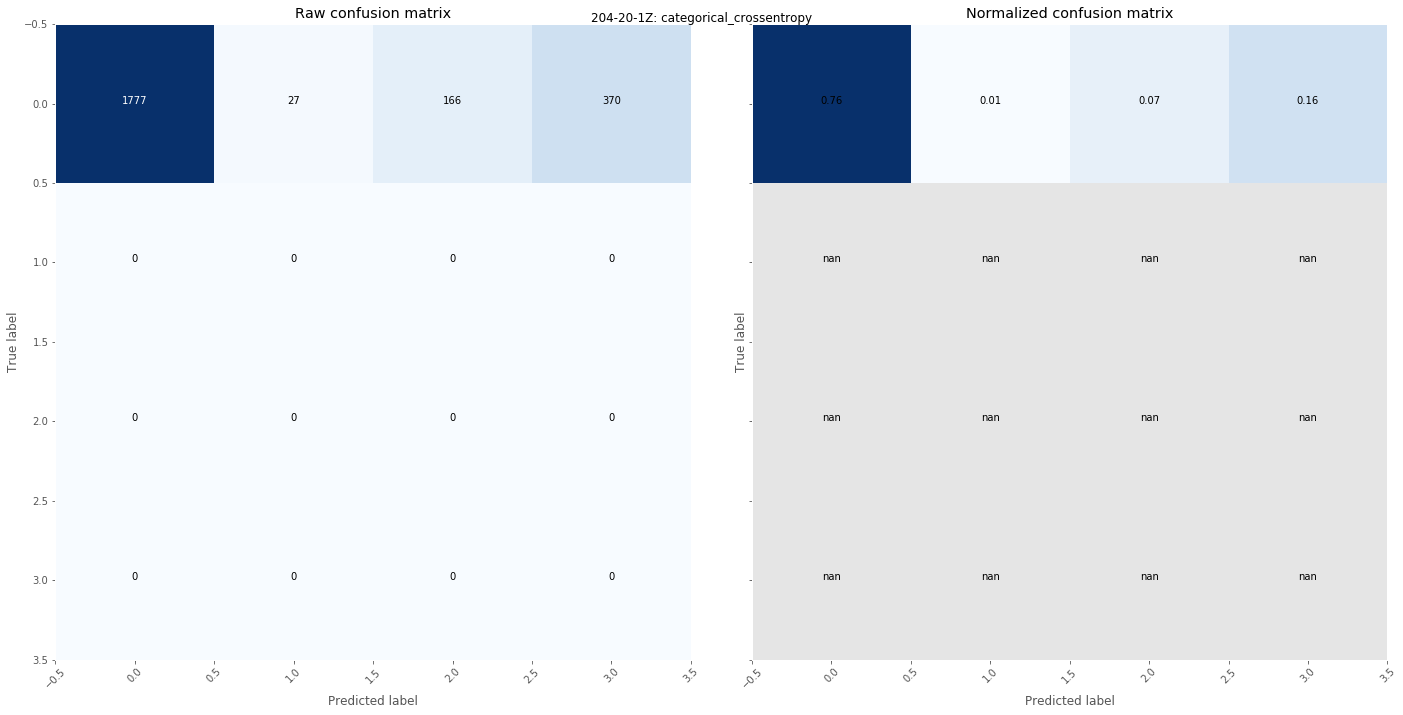


MODELING WITH LOSS: ordinal_squared_error

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_11 (InputLayer)           (None, 4096)         0                                            
__________________________________________________________________________________________________
reshape_10 (Reshape)            (None, 4096, 1)      0           input_11[0][0]                   
__________________________________________________________________________________________________
conv1d_660 (Conv1D)             (None, 4096, 64)     512         reshape_10[0][0]                 
__________________________________________________________________________________________________
conv1d_661 (Conv1D)             (None, 4096, 128)    24704       conv1d_660[0][0]                 
_________________________________________________________________

22/22 [==============================] - 29s 1s/step - loss: 1.7202 - acc: 0.2732 - val_loss: 5.9862 - val_acc: 0.7183
Epoch 2/15
22/22 [==============================] - 9s 394ms/step - loss: 1.2578 - acc: 0.4582 - val_loss: 8.3940 - val_acc: 0.7310
Epoch 3/15
22/22 [==============================] - 9s 395ms/step - loss: 1.2159 - acc: 0.4902 - val_loss: 6.7873 - val_acc: 0.7263
Epoch 4/15
22/22 [==============================] - 9s 396ms/step - loss: 1.1957 - acc: 0.4946 - val_loss: 6.9256 - val_acc: 0.6971
Epoch 5/15
22/22 [==============================] - 9s 396ms/step - loss: 1.2136 - acc: 0.5020 - val_loss: 7.3507 - val_acc: 0.7254
Epoch 6/15
22/22 [==============================] - 9s 395ms/step - loss: 1.1861 - acc: 0.5109 - val_loss: 6.8782 - val_acc: 0.7467
Epoch 7/15
22/22 [==============================] - 9s 397ms/step - loss: 1.1688 - acc: 0.5185 - val_loss: 7.4424 - val_acc: 0.7424
Epoch 8/15
22/22 [==============================] - 9s 396ms/step - loss: 1.1772 - acc: 0

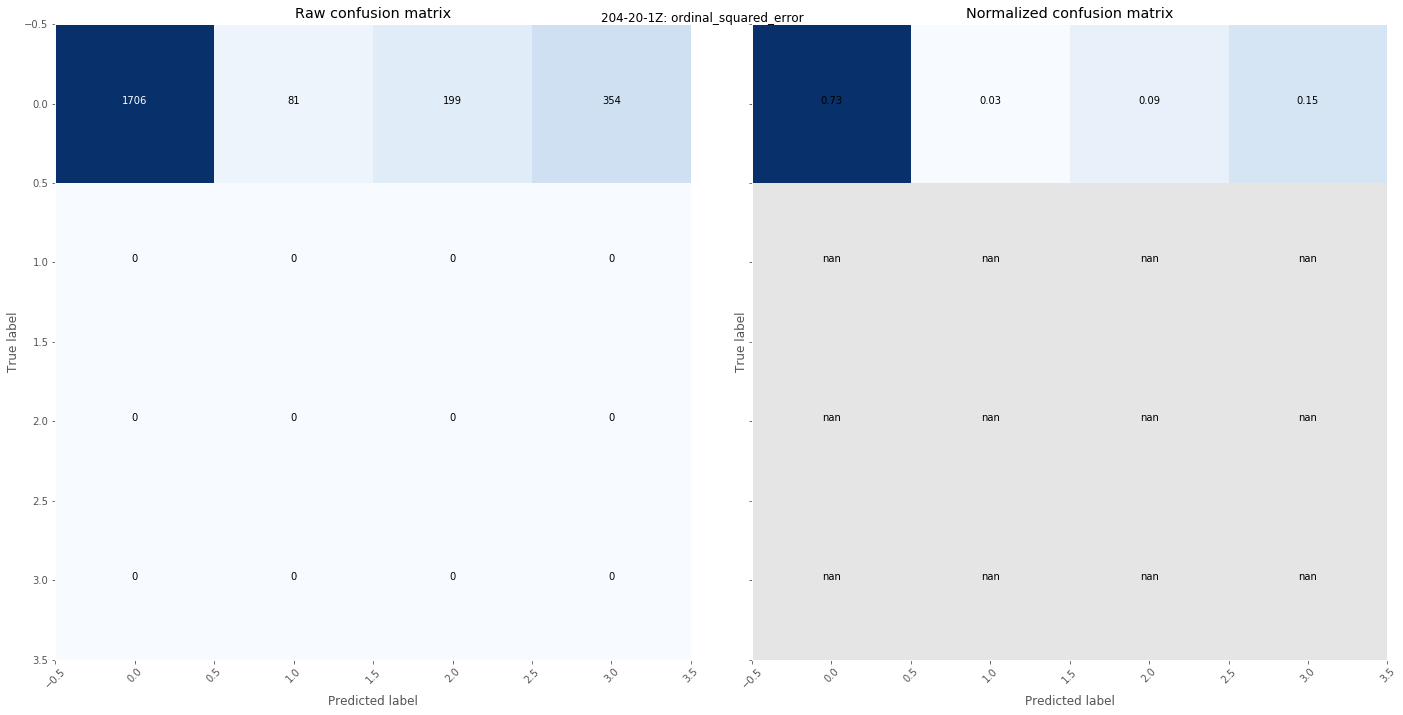


MODELING WITH LOSS: {'categorical_crossentropy': 0.2, 'ordinal_squared_error': 0.8}

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_12 (InputLayer)           (None, 4096)         0                                            
__________________________________________________________________________________________________
reshape_11 (Reshape)            (None, 4096, 1)      0           input_12[0][0]                   
__________________________________________________________________________________________________
conv1d_726 (Conv1D)             (None, 4096, 64)     512         reshape_11[0][0]                 
__________________________________________________________________________________________________
conv1d_727 (Conv1D)             (None, 4096, 128)    24704       conv1d_726[0][0]                 
_______________________

22/22 [==============================] - 31s 1s/step - loss: 1.5586 - acc: 0.4024 - val_loss: 5.9213 - val_acc: 0.6500
Epoch 2/15
22/22 [==============================] - 9s 387ms/step - loss: 1.3265 - acc: 0.4057 - val_loss: 6.2495 - val_acc: 0.6435
Epoch 3/15
22/22 [==============================] - 9s 388ms/step - loss: 1.2178 - acc: 0.4777 - val_loss: 6.2458 - val_acc: 0.7290
Epoch 4/15
22/22 [==============================] - 9s 400ms/step - loss: 1.1990 - acc: 0.5025 - val_loss: 5.9944 - val_acc: 0.6422
Epoch 5/15
22/22 [==============================] - 9s 389ms/step - loss: 1.1803 - acc: 0.5076 - val_loss: 6.9390 - val_acc: 0.7190
Epoch 6/15
22/22 [==============================] - 9s 389ms/step - loss: 1.1716 - acc: 0.5092 - val_loss: 7.6628 - val_acc: 0.7683
Epoch 7/15
22/22 [==============================] - 9s 390ms/step - loss: 1.1697 - acc: 0.5186 - val_loss: 8.2424 - val_acc: 0.7580
Epoch 8/15
22/22 [==============================] - 9s 389ms/step - loss: 1.1778 - acc: 0

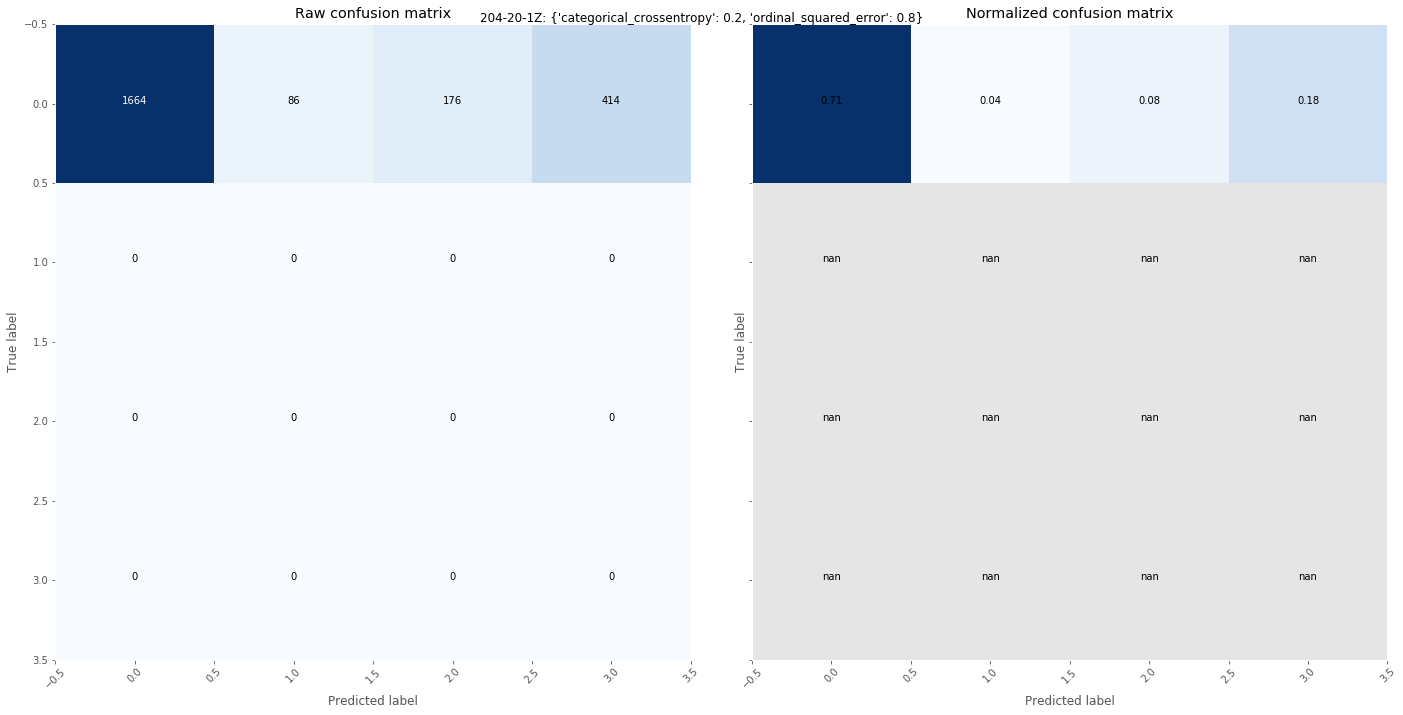



TESTING WITH TEST WELL: 204-19-6


Loading Well:  205-21b-3  from  /home/administrator/Dropbox/core_data/facies/train_data
Feature shapes:  [('depth', (3842,)), ('top', (3842,)), ('base', (3842,)), ('pseudoGR', (3842, 32))]
Loading Well:  204-20-6a  from  /home/administrator/Dropbox/core_data/facies/train_data
Feature shapes:  [('depth', (3873,)), ('top', (3873,)), ('base', (3873,)), ('pseudoGR', (3873, 32))]
Loading Well:  204-24a-6  from  /home/administrator/Dropbox/core_data/facies/train_data
Feature shapes:  [('depth', (13006,)), ('top', (13006,)), ('base', (13006,)), ('pseudoGR', (13006, 32))]
Loading Well:  204-20-1Z  from  /home/administrator/Dropbox/core_data/facies/train_data
Feature shapes:  [('depth', (2340,)), ('top', (2340,)), ('base', (2340,)), ('pseudoGR', (2340, 32))]
Loading Well:  204-19-6  from  /home/administrator/Dropbox/core_data/facies/train_data
Feature shapes:  [('depth', (1884,)), ('top', (1884,)), ('base', (1884,)), ('pseudoGR', (1884, 32))]

MODELING WITH 

23/23 [==============================] - 32s 1s/step - loss: 1.6448 - acc: 0.3494 - val_loss: 1.0760 - val_acc: 0.5739
Epoch 2/15
23/23 [==============================] - 9s 372ms/step - loss: 1.2770 - acc: 0.4551 - val_loss: 1.0628 - val_acc: 0.5762
Epoch 3/15
23/23 [==============================] - 9s 384ms/step - loss: 1.1884 - acc: 0.5096 - val_loss: 1.0688 - val_acc: 0.5742
Epoch 4/15
23/23 [==============================] - 9s 386ms/step - loss: 1.1549 - acc: 0.5299 - val_loss: 1.0764 - val_acc: 0.5767
Epoch 5/15
23/23 [==============================] - 9s 384ms/step - loss: 1.1859 - acc: 0.5044 - val_loss: 1.0684 - val_acc: 0.5742
Epoch 6/15
23/23 [==============================] - 9s 384ms/step - loss: 1.1625 - acc: 0.5240 - val_loss: 1.0523 - val_acc: 0.5684
Epoch 7/15
23/23 [==============================] - 9s 385ms/step - loss: 1.1276 - acc: 0.5557 - val_loss: 1.0424 - val_acc: 0.5725
Epoch 8/15
23/23 [==============================] - 9s 384ms/step - loss: 1.1681 - acc: 0

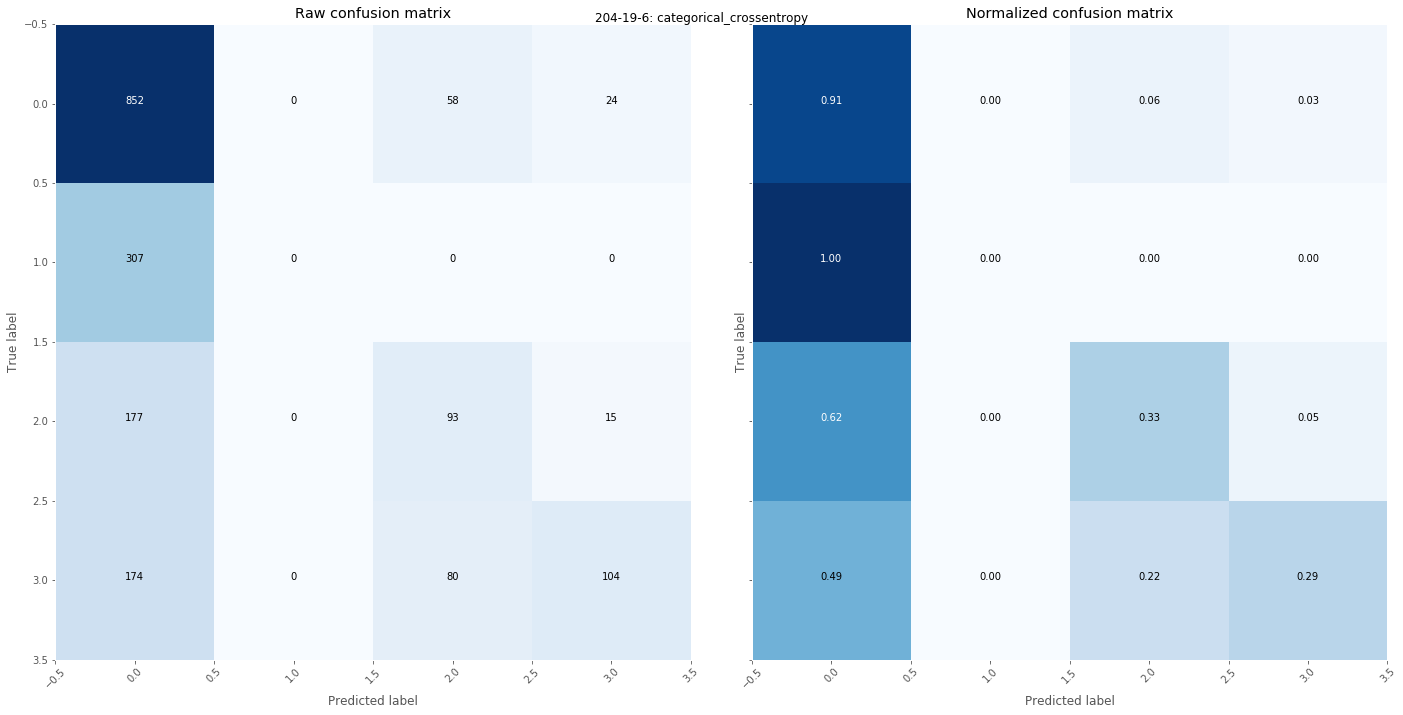


MODELING WITH LOSS: ordinal_squared_error

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_14 (InputLayer)           (None, 4096)         0                                            
__________________________________________________________________________________________________
reshape_13 (Reshape)            (None, 4096, 1)      0           input_14[0][0]                   
__________________________________________________________________________________________________
conv1d_858 (Conv1D)             (None, 4096, 64)     512         reshape_13[0][0]                 
__________________________________________________________________________________________________
conv1d_859 (Conv1D)             (None, 4096, 128)    24704       conv1d_858[0][0]                 
_________________________________________________________________

23/23 [==============================] - 34s 1s/step - loss: 1.5849 - acc: 0.3384 - val_loss: 1.1596 - val_acc: 0.5859
Epoch 2/15
23/23 [==============================] - 9s 383ms/step - loss: 1.2547 - acc: 0.4481 - val_loss: 1.1314 - val_acc: 0.5597
Epoch 3/15
23/23 [==============================] - 9s 386ms/step - loss: 1.2118 - acc: 0.5124 - val_loss: 1.0628 - val_acc: 0.5670
Epoch 4/15
23/23 [==============================] - 9s 387ms/step - loss: 1.1740 - acc: 0.5302 - val_loss: 1.0945 - val_acc: 0.5723
Epoch 5/15
23/23 [==============================] - 9s 386ms/step - loss: 1.1374 - acc: 0.5399 - val_loss: 1.1469 - val_acc: 0.5444
Epoch 6/15
23/23 [==============================] - 9s 386ms/step - loss: 1.1609 - acc: 0.5385 - val_loss: 1.0706 - val_acc: 0.5527
Epoch 7/15
23/23 [==============================] - 9s 386ms/step - loss: 1.1588 - acc: 0.5452 - val_loss: 1.0996 - val_acc: 0.5672
Epoch 8/15
23/23 [==============================] - 9s 385ms/step - loss: 1.1536 - acc: 0

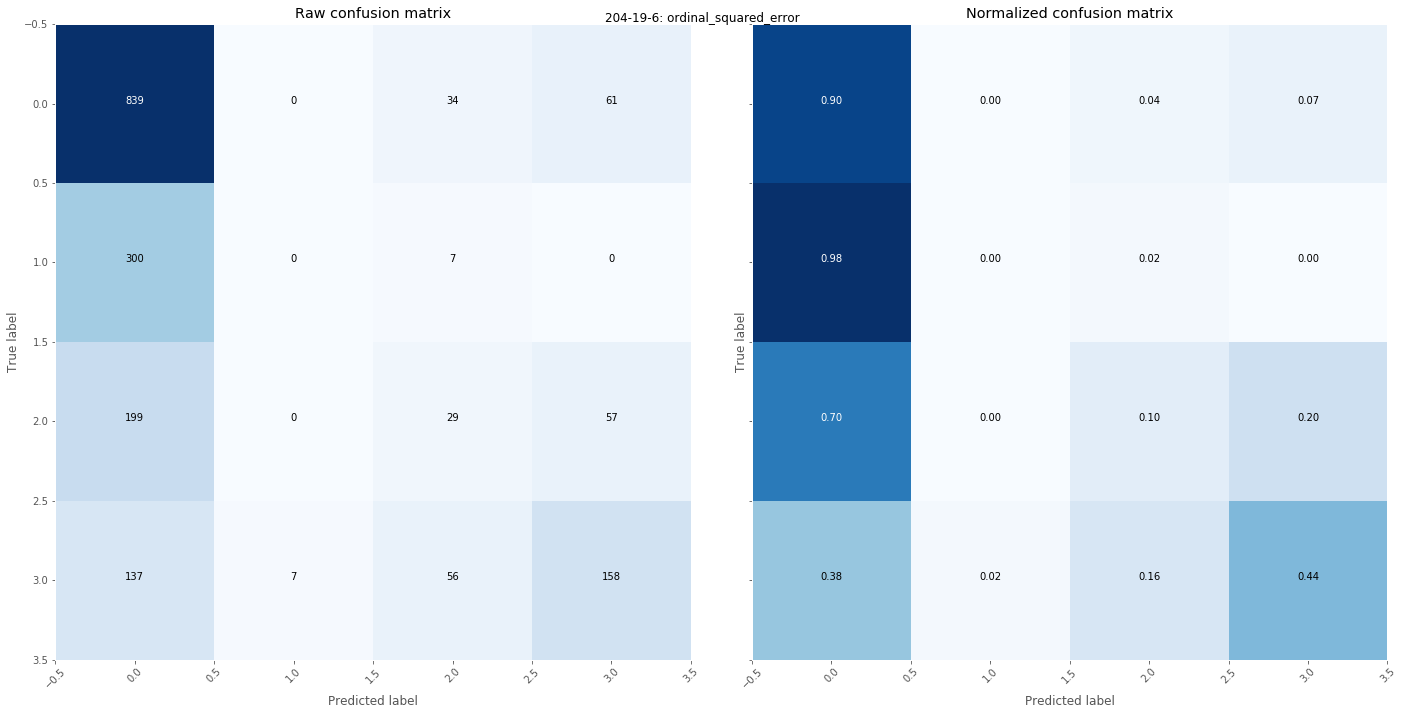


MODELING WITH LOSS: {'categorical_crossentropy': 0.2, 'ordinal_squared_error': 0.8}

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_15 (InputLayer)           (None, 4096)         0                                            
__________________________________________________________________________________________________
reshape_14 (Reshape)            (None, 4096, 1)      0           input_15[0][0]                   
__________________________________________________________________________________________________
conv1d_924 (Conv1D)             (None, 4096, 64)     512         reshape_14[0][0]                 
__________________________________________________________________________________________________
conv1d_925 (Conv1D)             (None, 4096, 128)    24704       conv1d_924[0][0]                 
_______________________

23/23 [==============================] - 36s 2s/step - loss: 1.6007 - acc: 0.3664 - val_loss: 1.1721 - val_acc: 0.5781
Epoch 2/15
23/23 [==============================] - 9s 378ms/step - loss: 1.2418 - acc: 0.4634 - val_loss: 1.0511 - val_acc: 0.5728
Epoch 3/15
23/23 [==============================] - 9s 382ms/step - loss: 1.2074 - acc: 0.5134 - val_loss: 1.1158 - val_acc: 0.5787
Epoch 4/15
23/23 [==============================] - 9s 383ms/step - loss: 1.1616 - acc: 0.5237 - val_loss: 1.1014 - val_acc: 0.5787
Epoch 5/15
23/23 [==============================] - 9s 383ms/step - loss: 1.2078 - acc: 0.4865 - val_loss: 1.2045 - val_acc: 0.5564
Epoch 6/15
23/23 [==============================] - 9s 382ms/step - loss: 1.2088 - acc: 0.4840 - val_loss: 1.1041 - val_acc: 0.5770
Epoch 7/15
23/23 [==============================] - 9s 398ms/step - loss: 1.1855 - acc: 0.5176 - val_loss: 1.1554 - val_acc: 0.5728
Epoch 8/15
23/23 [==============================] - 9s 380ms/step - loss: 1.1443 - acc: 0

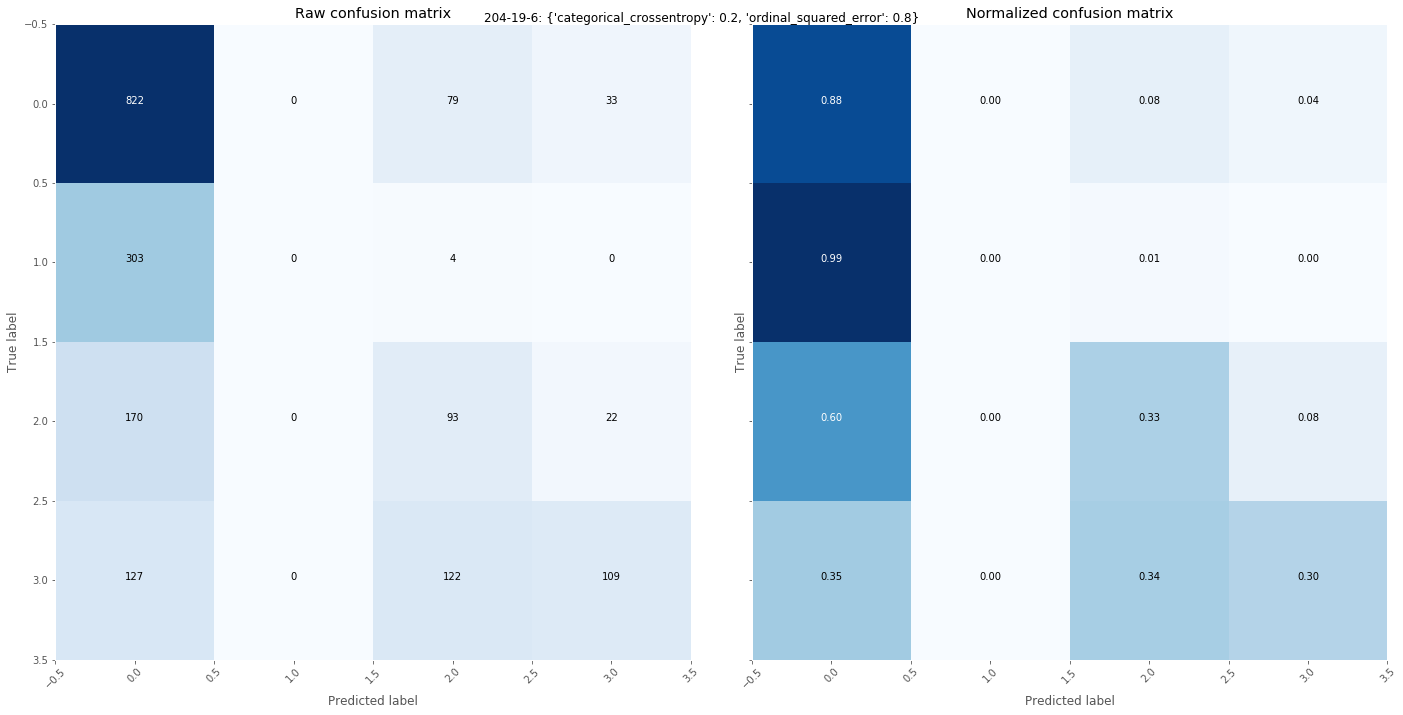

In [2]:
for test_well in well_names:
    
    print(f'\n\nTESTING WITH TEST WELL: {test_well}\n\n')
    
    fdset = FaciesDataset([name for name in well_names if name != test_well],
                    test_wells=[test_well],
                    features=["pseudoGR"],
                    label_resolution=32, 
                    pseudoGR_args={'scale_mode' : 'robust'})

    fdset.load_or_generate_data()
    
    for loss in loss_options:
        
        print(f'\nMODELING WITH LOSS: {loss}\n')
        
        model_args = {**wavenet_model_args, **{'loss': loss}}
        
        wavenet_model = NetworkModel(fdset, model_args=wavenet_model_args)
    
        wavenet_model.fit(fdset, **fit_args)
        
        y_pred = wavenet_model.predict(fdset.X_test)

        cm = confusion_matrix(fdset.y_test, y_pred)
        
        fig, ax = plt.subplots(ncols=2, sharey=True, figsize=(20,10))
        fig.suptitle(f'{test_well}: {loss}')

        model_plots.confusion_matrix_plot(cm, fdset.classes, ax=ax[0])
        model_plots.confusion_matrix_plot(cm, fdset.classes, ax=ax[1], normalize=True)
        
        plt.show()

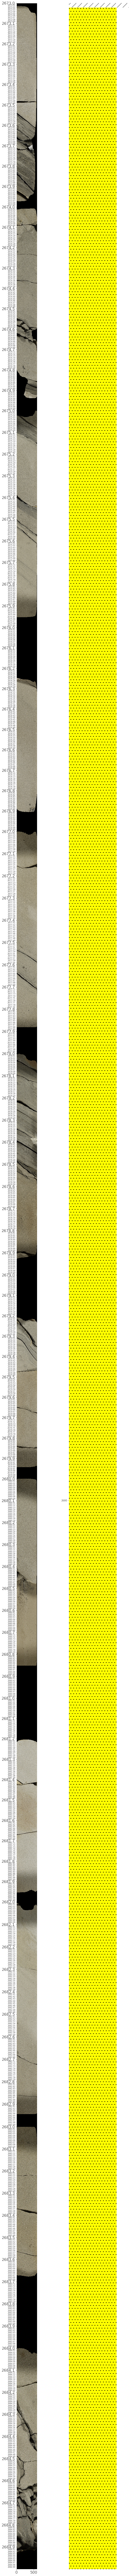

In [7]:
# What's up with this well -- all sand?
from corebreakout.facies.viz import CorePlotter

fdset = Facies

well = fdset.get_well("204-20-1Z")

cplotter = CorePlotter(figsize=(10,200))
cplotter.plot_image(well._image / 255.0, depths=well._depth)

labels = well.make_striplog()
cplotter.plot_strip(labels)

plt.show()

## Categorical Loss

In [2]:
well_names = ["205-21b-3", "204-20-6a", "204-20-1Z", "204-19-6", "204-24a-6"]

fdset = FaciesDataset(well_names[:-1], [well_names[-1]], features=['pseudoGR'], label_resolution=32)

fdset.load_or_generate_data()

Loading Well:  205-21b-3  from  /home/administrator/Dropbox/core_data/facies/train_data
Feature shapes:  [('depth', (3842,)), ('top', (3842,)), ('base', (3842,)), ('pseudoGR', (3842, 32))]
Loading Well:  204-20-6a  from  /home/administrator/Dropbox/core_data/facies/train_data
Feature shapes:  [('depth', (3873,)), ('top', (3873,)), ('base', (3873,)), ('pseudoGR', (3873, 32))]
Loading Well:  204-20-1Z  from  /home/administrator/Dropbox/core_data/facies/train_data
Feature shapes:  [('depth', (1917,)), ('top', (1917,)), ('base', (1917,)), ('pseudoGR', (1917, 32))]
Loading Well:  204-19-6  from  /home/administrator/Dropbox/core_data/facies/train_data
Feature shapes:  [('depth', (1884,)), ('top', (1884,)), ('base', (1884,)), ('pseudoGR', (1884, 32))]
Loading Well:  204-24a-6  from  /home/administrator/Dropbox/core_data/facies/train_data
Feature shapes:  [('depth', (13006,)), ('top', (13006,)), ('base', (13006,)), ('pseudoGR', (13006, 32))]


In [3]:
wavenet_model_args = {
    'feature' : 'pseudoGR',
    'network' : 'wavenet',
    'summary' : False,
    'sequence_size' : 128,
    'network_args' : {
        'num_blocks' : 20,
        'block_filters' : 128,
        'residual_filters' : 64,
        'output_resolution' : fdset.label_resolution,
        'dropout_rate' : 0.5,
    },
    'optimizer_args' : {
        'optimizer' : 'Adam',
    },
    'loss' : 'categorical_crossentropy'
}

fit_args = {
    'batch_size' : 32,
    'epochs' : 15,
    'step_size' : wavenet_model.sequence_size - 32
}



In [4]:
fit_args = {
    'batch_size' : 32,
    'epochs' : 15,
    'step_size' : wavenet_model.sequence_size - 32
}

wavenet_model.fit(fdset, **fit_args)

here 1
here 2
Shapes of `(batch_X, batch_y)`: (32, 4096), (32, 128, 4)
Epoch 1/15
4/4 [==============================] - 17s 4s/step - loss: 4.0121 - acc: 0.2374 - val_loss: 1.5847 - val_acc: 0.2989
Epoch 2/15
4/4 [==============================] - 4s 1s/step - loss: 1.3256 - acc: 0.2778 - val_loss: 1.3774 - val_acc: 0.2958
Epoch 3/15
4/4 [==============================] - 4s 1s/step - loss: 1.2260 - acc: 0.4007 - val_loss: 1.4497 - val_acc: 0.3185
Epoch 4/15
4/4 [==============================] - 4s 1s/step - loss: 1.1262 - acc: 0.4781 - val_loss: 1.5256 - val_acc: 0.2935
Epoch 5/15
4/4 [==============================] - 4s 1s/step - loss: 1.1178 - acc: 0.4855 - val_loss: 1.7021 - val_acc: 0.3205
Epoch 6/15
4/4 [==============================] - 4s 1s/step - loss: 1.1068 - acc: 0.5013 - val_loss: 1.4861 - val_acc: 0.2575
Epoch 7/15
4/4 [==============================] - 4s 1s/step - loss: 1.1001 - acc: 0.5066 - val_loss: 1.5806 - val_acc: 0.3081
Epoch 8/15
4/4 [=======================

1.364615811949113

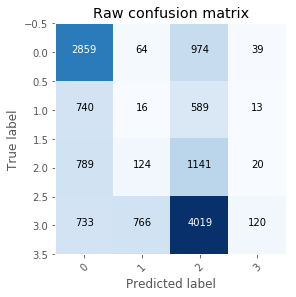

In [5]:
from sklearn.metrics import confusion_matrix

y_pred = wavenet_model.predict(fdset.X_test)

cm = confusion_matrix(fdset.y_test, y_pred)

model_plots.confusion_matrix_plot(cm, fdset.classes)

## Ordinal Loss

In [6]:
wavenet_model_args['loss'] = 'ordinal_squared_error'

wavenet_model = NetworkModel(fdset, model_args=wavenet_model_args)

wavenet_model.fit(fdset, **fit_args)

Shapes of `(batch_X, batch_y)`: (32, 4096), (32, 128, 4)
Epoch 1/15
4/4 [==============================] - 15s 4s/step - loss: 1.7321 - acc: 0.2377 - val_loss: 2.1522 - val_acc: 0.1086
Epoch 2/15
4/4 [==============================] - 4s 1s/step - loss: 1.1659 - acc: 0.2737 - val_loss: 1.8826 - val_acc: 0.1103
Epoch 3/15
4/4 [==============================] - 4s 1s/step - loss: 0.9399 - acc: 0.3167 - val_loss: 1.4949 - val_acc: 0.1479
Epoch 4/15
4/4 [==============================] - 4s 1s/step - loss: 0.8598 - acc: 0.3168 - val_loss: 1.3050 - val_acc: 0.1528
Epoch 5/15
4/4 [==============================] - 4s 1s/step - loss: 0.8054 - acc: 0.3339 - val_loss: 1.3663 - val_acc: 0.1533
Epoch 6/15
4/4 [==============================] - 4s 1s/step - loss: 0.7961 - acc: 0.3319 - val_loss: 1.3838 - val_acc: 0.1523
Epoch 7/15
4/4 [==============================] - 4s 1s/step - loss: 0.7616 - acc: 0.3335 - val_loss: 1.3796 - val_acc: 0.1563
Epoch 8/15
4/4 [==============================] - 4s 

1.3045707395265775

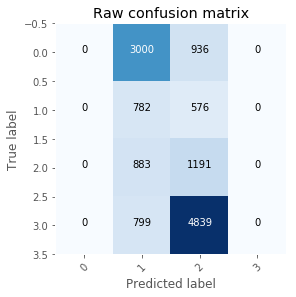

In [7]:
y_pred = wavenet_model.predict(fdset.X_test)

cm = confusion_matrix(fdset.y_test, y_pred)

model_plots.confusion_matrix_plot(cm, fdset.classes)

## Combined Loss

In [8]:
wavenet_model_args['loss'] = {'categorical_crossentropy': 0.15, 
                              'ordinal_squared_error' : 0.85}

wavenet_model = NetworkModel(fdset, model_args=wavenet_model_args)

In [9]:
wavenet_model.fit(fdset, **fit_args)

here 1
here 2
Shapes of `(batch_X, batch_y)`: (32, 4096), (32, 128, 4)
Epoch 1/15
4/4 [==============================] - 16s 4s/step - loss: 2.3566 - acc: 0.2562 - val_loss: 2.5296 - val_acc: 0.1086
Epoch 2/15
4/4 [==============================] - 4s 1s/step - loss: 1.2528 - acc: 0.2550 - val_loss: 1.6835 - val_acc: 0.3062
Epoch 3/15
4/4 [==============================] - 4s 1s/step - loss: 0.9287 - acc: 0.3414 - val_loss: 1.5673 - val_acc: 0.5845
Epoch 4/15
4/4 [==============================] - 4s 1s/step - loss: 0.8296 - acc: 0.4420 - val_loss: 1.6564 - val_acc: 0.3078
Epoch 5/15
4/4 [==============================] - 4s 1s/step - loss: 0.8086 - acc: 0.4906 - val_loss: 1.5276 - val_acc: 0.2826
Epoch 6/15
4/4 [==============================] - 4s 1s/step - loss: 0.7738 - acc: 0.4894 - val_loss: 1.5822 - val_acc: 0.3096
Epoch 7/15
4/4 [==============================] - 4s 1s/step - loss: 0.7741 - acc: 0.4554 - val_loss: 1.4034 - val_acc: 0.2447
Epoch 8/15
4/4 [=======================

1.3271017201520778

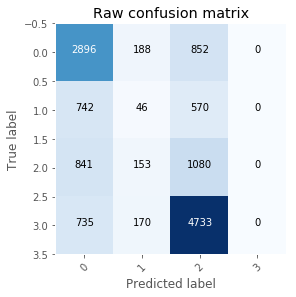

In [10]:
y_pred = wavenet_model.predict(fdset.X_test)

cm = confusion_matrix(fdset.y_test, y_pred)

model_plots.confusion_matrix_plot(cm, fdset.classes)

## Try same with class weighting

In [20]:
fit_args['class_weighted'] = True
fit_args['epochs'] = 9

wavenet_model = NetworkModel(fdset, model_args=wavenet_model_args)

wavenet_model.fit(fdset, **fit_args)

here 1
here 2
Shapes of `(batch_X, batch_y)`: (32, 4096), (32, 128, 4)
Epoch 1/9
4/4 [==============================] - 21s 5s/step - loss: 1.3692 - acc: 0.2569 - val_loss: 1.7527 - val_acc: 0.1086
Epoch 2/9
4/4 [==============================] - 5s 1s/step - loss: 0.8430 - acc: 0.2627 - val_loss: 1.3874 - val_acc: 0.1108
Epoch 3/9
4/4 [==============================] - 5s 1s/step - loss: 0.6668 - acc: 0.4149 - val_loss: 1.3284 - val_acc: 0.3166
Epoch 4/9
4/4 [==============================] - 5s 1s/step - loss: 0.6342 - acc: 0.4755 - val_loss: 1.2251 - val_acc: 0.2877
Epoch 5/9
4/4 [==============================] - 5s 1s/step - loss: 0.6084 - acc: 0.4630 - val_loss: 1.0920 - val_acc: 0.5148
Epoch 6/9
4/4 [==============================] - 5s 1s/step - loss: 0.6390 - acc: 0.4486 - val_loss: 1.2628 - val_acc: 0.2569
Epoch 7/9
4/4 [==============================] - 5s 1s/step - loss: 0.6209 - acc: 0.3951 - val_loss: 1.2749 - val_acc: 0.2964
Epoch 8/9
4/4 [==============================]

1.091979438011293

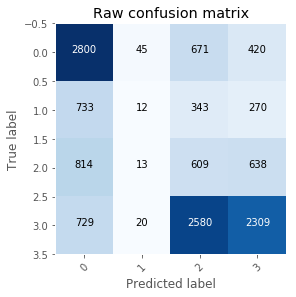

In [21]:
y_pred = wavenet_model.predict(fdset.X_test)

cm = confusion_matrix(fdset.y_test, y_pred)

model_plots.confusion_matrix_plot(cm, fdset.classes)

In [13]:
np.bincount(fdset.y_train) / fdset.y_train.size

array([0.28759986, 0.2451372 , 0.33475165, 0.13251129])

In [22]:
fit_args['class_weighted'] = True
fit_args['epochs'] = 30

wavenet_model = NetworkModel(fdset, model_args=wavenet_model_args)

wavenet_model.fit(fdset, **fit_args)

here 1
here 2
Shapes of `(batch_X, batch_y)`: (32, 4096), (32, 128, 4)
Epoch 1/30
4/4 [==============================] - 23s 6s/step - loss: 1.6039 - acc: 0.1957 - val_loss: 1.7008 - val_acc: 0.1086
Epoch 2/30
4/4 [==============================] - 5s 1s/step - loss: 0.8408 - acc: 0.2481 - val_loss: 1.2969 - val_acc: 0.1095
Epoch 3/30
4/4 [==============================] - 5s 1s/step - loss: 0.6670 - acc: 0.3901 - val_loss: 1.1923 - val_acc: 0.1484
Epoch 4/30
4/4 [==============================] - 5s 1s/step - loss: 0.6032 - acc: 0.4014 - val_loss: 1.3088 - val_acc: 0.2751
Epoch 5/30
4/4 [==============================] - 5s 1s/step - loss: 0.6213 - acc: 0.4638 - val_loss: 1.4025 - val_acc: 0.2867
Epoch 6/30
4/4 [==============================] - 5s 1s/step - loss: 0.6182 - acc: 0.4314 - val_loss: 1.1638 - val_acc: 0.1485
Epoch 7/30
4/4 [==============================] - 5s 1s/step - loss: 0.6025 - acc: 0.4453 - val_loss: 1.2229 - val_acc: 0.2925
Epoch 8/30
4/4 [=======================

1.0717799265903456